In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords", download_dir='C:/Users/KEERTHI RAJ/Desktop/KEERTHI RAJ/PROJECTS/NAIVE BAYES CLASSIFIER')
nltk.data.path.append('corpora/stopwords/')

[nltk_data] Downloading package stopwords to C:/Users/KEERTHI
[nltk_data]     RAJ/Desktop/KEERTHI RAJ/PROJECTS/NAIVE BAYES
[nltk_data]     CLASSIFIER...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Step 1: Data Loading and Preprocessing
data = pd.read_csv('train_essays.csv')  # Replace 'your_data.csv' with your actual dataset file

In [3]:
data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [4]:
data.shape

(43057, 2)

In [5]:
print("Generated By LLM :",data[data['generated']==1].shape[0])
print("Written by a Student :",data[data['generated']==0].shape[0])

Generated By LLM : 13181
Written by a Student : 29876


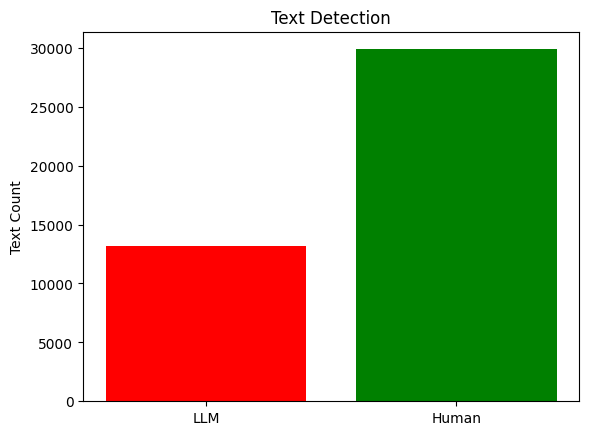

In [6]:
import matplotlib.pyplot as plt
generated_count = data[data['generated'] == 1].shape[0]
student_count = data[data['generated'] == 0].shape[0]
categories = ['LLM', 'Human']
counts = [generated_count, student_count]

# Plotting the bar chart
plt.bar(categories, counts, color=['red', 'green'])
plt.title('Text Detection')
plt.ylabel('Text Count')
plt.show()


In [10]:
# Tokenize the essays
data['tokens'] = data['text'].apply(lambda x: word_tokenize(x.lower()))

In [7]:
def tokenize(text):
        stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re', 
    'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he', 
    'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s', 
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'don\'t', 'should', 
    'should\'ve', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 
    'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 
    'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 
    'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 
    'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t'
]

        tokens = word_tokenize(text.lower())  # Convert to lower case here
        filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return filtered_tokens


In [8]:
# Split the dataset into train and development sets
train_data, dev_data = train_test_split(data['text'], test_size=0.3, random_state=30)


In [9]:
train_data = tokenize(train_data)

AttributeError: 'Series' object has no attribute 'lower'

In [ ]:

# Step 2: Build Vocabulary
all_tokens = [token for tokens in train_data['tokens'] for token in tokens]
token_counts = pd.Series(all_tokens).value_counts()

# Create a vocabulary list (omit rare words with occurrences less than 5)
vocabulary = list(token_counts[token_counts >= 5].index)

# Create a reverse index for the vocabulary
reverse_index = {word: idx for idx, word in enumerate(vocabulary)}

In [ ]:
print(vocabulary)
print(reverse_index)

In [ ]:
# Step 3: Naive Bayes Classifier Implementation
class NaiveBayesClassifier:
    def __init__(self, vocabulary, reverse_index):
        self.vocabulary = vocabulary
        self.reverse_index = reverse_index
        self.class_word_counts = {'0': np.zeros(len(vocabulary)), '1': np.zeros(len(vocabulary))}
        self.class_counts = {'0': 0, '1': 0}

    def tokenize(self, text):
        stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re', 
    'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he', 
    'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s', 
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'don\'t', 'should', 
    'should\'ve', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 
    'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 
    'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 
    'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 
    'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t'
]

        tokens = word_tokenize(text.lower())  # Convert to lower case here
        filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return filtered_tokens

    def train(self, train_data):
        for _, row in train_data.iterrows():
            tokens = self.tokenize(row['text'])
            label = str(row['generated'])  # Assuming 'generated' column has values 0 or 1
            for token in tokens:
                if token in self.vocabulary:
                    self.class_word_counts[label][self.reverse_index[token]] += 1
            self.class_counts[label] += 1

    # def train(self, train_data, alpha = 0.1):
    #     for _, row in train_data.iterrows():
    #         tokens = self.tokenize(row['text'])
    #         label = str(row['generated'])  # Assuming 'generated' column has values 0 or 1
    #         for token in tokens:
    #             if token in self.vocabulary:
    #                 if alpha is not None:
    #                     self.class_word_counts[label][self.reverse_index[token]] += alpha
    #                 else:
    #                     self.class_word_counts[label][self.reverse_index[token]] += 1
    #         if alpha == None:
    #             self.class_counts[label] += len(tokens)
    #         else:
    #             self.class_counts[label] += alpha * len(self.vocabulary)
                


    def calculate_probability(self, word_idx, label):
        return self.class_word_counts[label][word_idx] / self.class_counts[label]

    def predict(self, document):
        tokens = self.tokenize(document)
        probabilities = {label: 1.0 for label in self.class_counts.keys()}

        for label in probabilities:
            for token in tokens:
                if token in self.vocabulary:
                    word_idx = self.reverse_index[token]
                    probabilities[label] *= self.calculate_probability(word_idx, label)

        return max(probabilities, key=probabilities.get)

    def evaluate_accuracy(self, dev_data):
        correct_predictions = 0
        total_predictions = len(dev_data)

        for _, row in dev_data.iterrows():
            predicted_label = self.predict(row['text'])
            true_label = str(row['generated'])
            if predicted_label == true_label:
                correct_predictions += 1

        accuracy = correct_predictions / total_predictions
        return accuracy
    
    def calculate_smoothed_probability(self, word_idx, label, alpha):
        numerator = self.class_word_counts[label][word_idx] + alpha
        denominator = self.class_counts[label] + alpha * len(self.vocabulary)
        return numerator / denominator

    def predict_with_smoothing(self, document, alpha):
        tokens = self.tokenize(document)
        probabilities = {label: 1.0 for label in self.class_counts.keys()}

        for label in probabilities:
            for token in tokens:
                if token in self.vocabulary:
                    word_idx = self.reverse_index[token]
                    probabilities[label] *= self.calculate_smoothed_probability(word_idx, label, alpha)

        return max(probabilities, key=probabilities.get)


In [64]:

# Step 4: Train the Naive Bayes Classifier
nb_classifier = NaiveBayesClassifier(vocabulary, reverse_index)
nb_classifier.train(train_data)

In [ ]:
# Step 5: Calculate and Print Accuracy on the Development Set
dev_accuracy = nb_classifier.evaluate_accuracy(dev_data)
print(f"Accuracy on Development Set: {dev_accuracy}")

In [ ]:
new_document = """
 is a priceless gem that embellishes the tapestry of our lives. It is a journey of shared laughter, silent understanding, and unwavering support. The true beauty of friendship lies not in its perfection but in its imperfections, as it is through these that the bonds are strengthened. As C.S. Lewis aptly said, "Friendship is born at that moment when one person says to another, 'What! You too? I thought I was the only one.'"
"""

# Use the trained model to predict the label
predicted_label = nb_classifier.predict(new_document)
print("Predicted Label:", predicted_label)

In [ ]:
def get_top_words(class_word_counts, reverse_index, class_label, top_n=10):
    word_indices = np.argsort(class_word_counts[class_label])[::-1][:top_n]
    top_words = [word for word, idx in reverse_index.items() if idx in word_indices]
    return top_words

# Get top words for each class
top_words_class_0 = get_top_words(nb_classifier.class_word_counts, reverse_index, '0')
top_words_class_1 = get_top_words(nb_classifier.class_word_counts, reverse_index, '1')

print("Top Words for Class 0:", top_words_class_0)
print("Top Words for Class 1:", top_words_class_1)

In [ ]:
# Load the test dataset (replace 'test_data.csv' with your actual test dataset file)
test_data = pd.read_csv('test_essays.csv')

# Predict labels for the test dataset using the optimal alpha value
optimal_alpha = 1.0  # Replace with the alpha value that performed the best in your experiments

# Initialize and train the classifier with the optimal alpha
nb_classifier_optimal = NaiveBayesClassifier(vocabulary, reverse_index)
nb_classifier_optimal.train(train_data, alpha=optimal_alpha)

# Make predictions on the test dataset
test_predictions = test_data['text'].apply(lambda x: nb_classifier_optimal.predict_with_smoothing(x, alpha=optimal_alpha))

In [ ]:
# Create a Kaggle submission file
submission_df = pd.DataFrame({'id': test_data['id'], 'generated': test_predictions})
submission_df.to_csv('submission.csv', index=False)